In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [26]:
companyOne = "AAPL"
companyTwo = "AMZN"
companyThree = "GOOG"

In [27]:
start = "2015-01-01"
end = "2023-01-01"

In [28]:
apple = yf.download(companyOne,start,end)
amazon = yf.download(companyTwo,start,end)
google = yf.download(companyThree,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


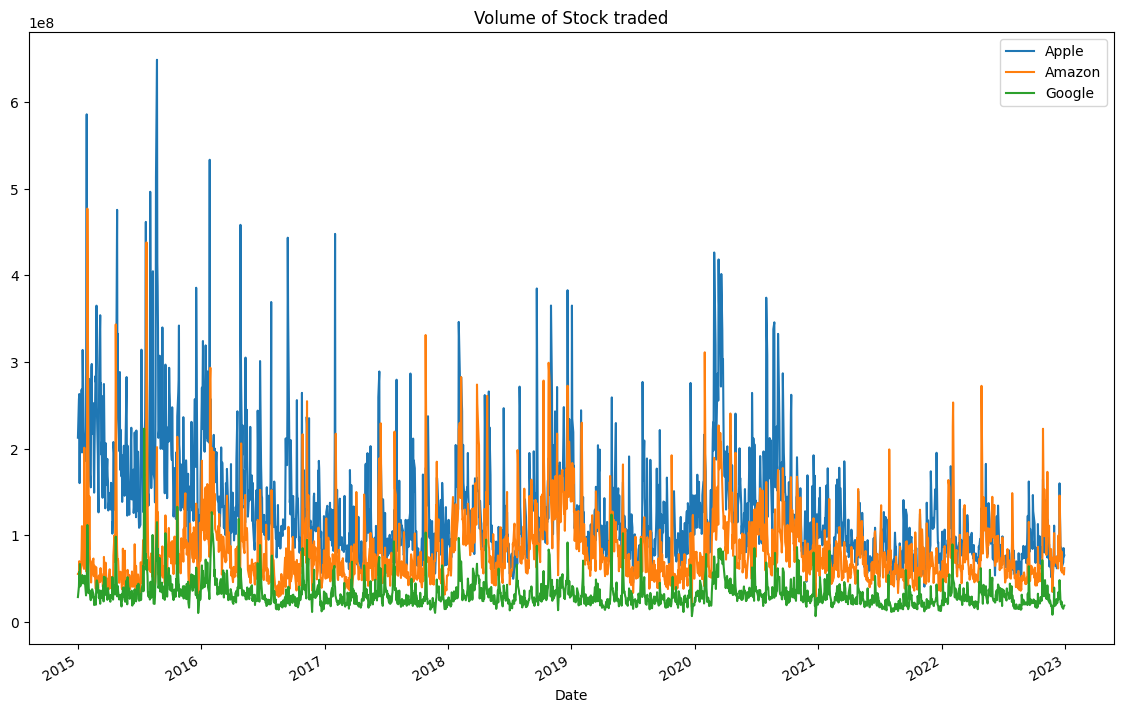

In [29]:
apple['Volume'].plot(label = 'Apple', figsize = (14,9))
amazon['Volume'].plot(label = "Amazon")
google['Volume'].plot(label = 'Google')
plt.title('Volume of Stock traded')
plt.legend()

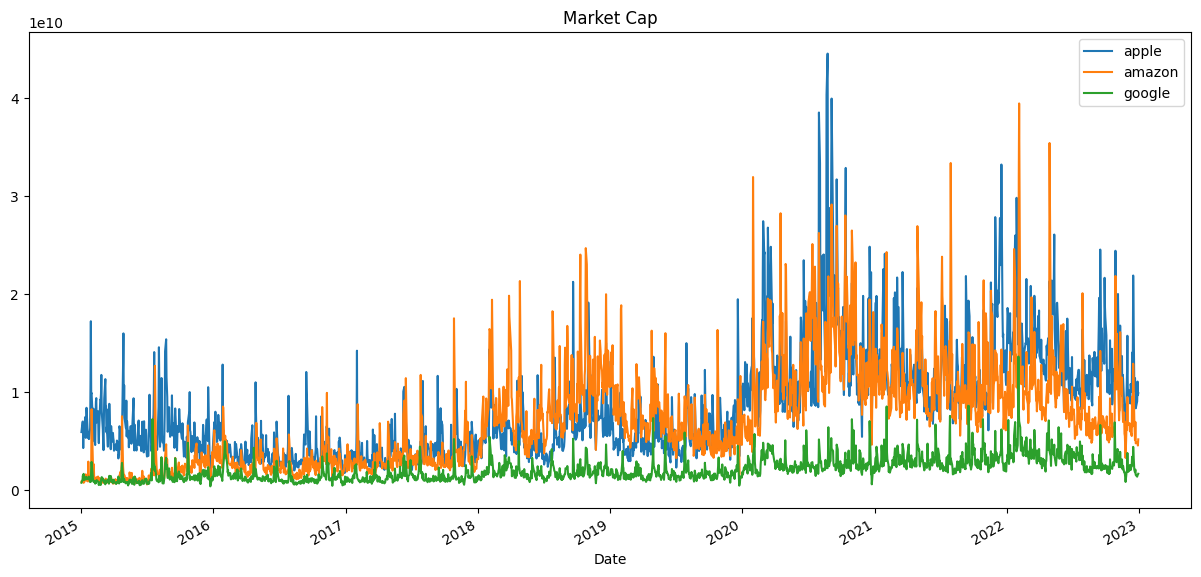

In [30]:
apple['MarktCap'] = apple['Open'] * apple['Volume']
amazon['MarktCap'] = amazon['Open'] * amazon['Volume']
google['MarktCap'] = google['Open'] * google['Volume']
apple['MarktCap'].plot(label = 'apple', figsize = (15,7))
amazon['MarktCap'].plot(label = 'amazon')
google['MarktCap'].plot(label = 'google')
plt.title('Market Cap')
plt.legend()

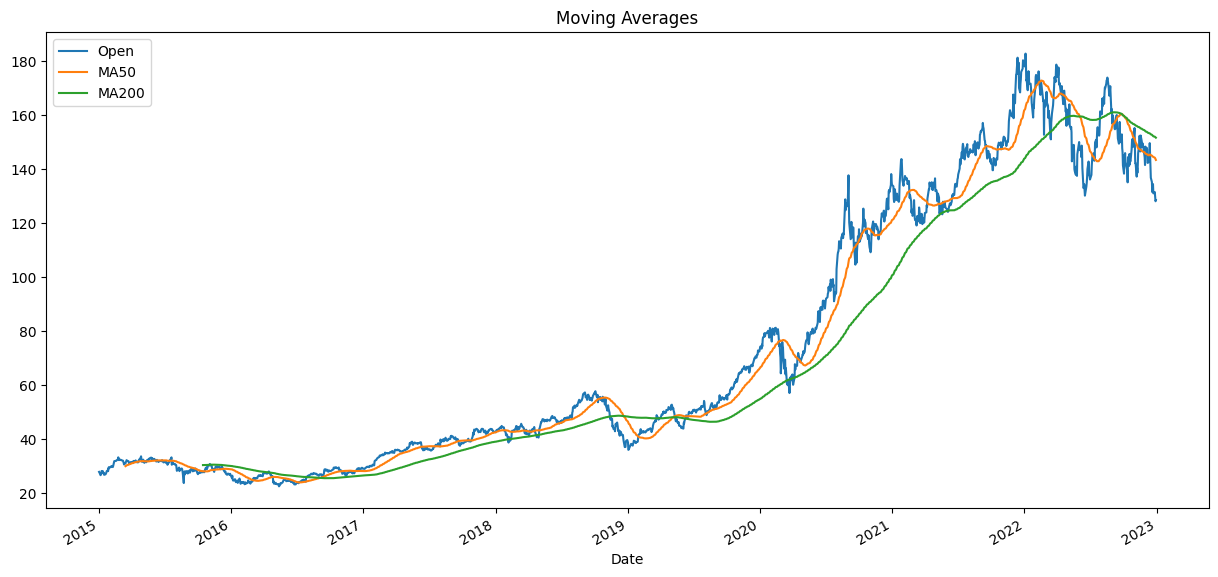

In [31]:
apple['MA50'] = apple['Open'].rolling(50).mean()
apple['MA200'] = apple['Open'].rolling(200).mean()
apple['Open'].plot(figsize = (15,7))
apple['MA50'].plot()
apple['MA200'].plot()
plt.title('Moving Averages')
plt.legend()

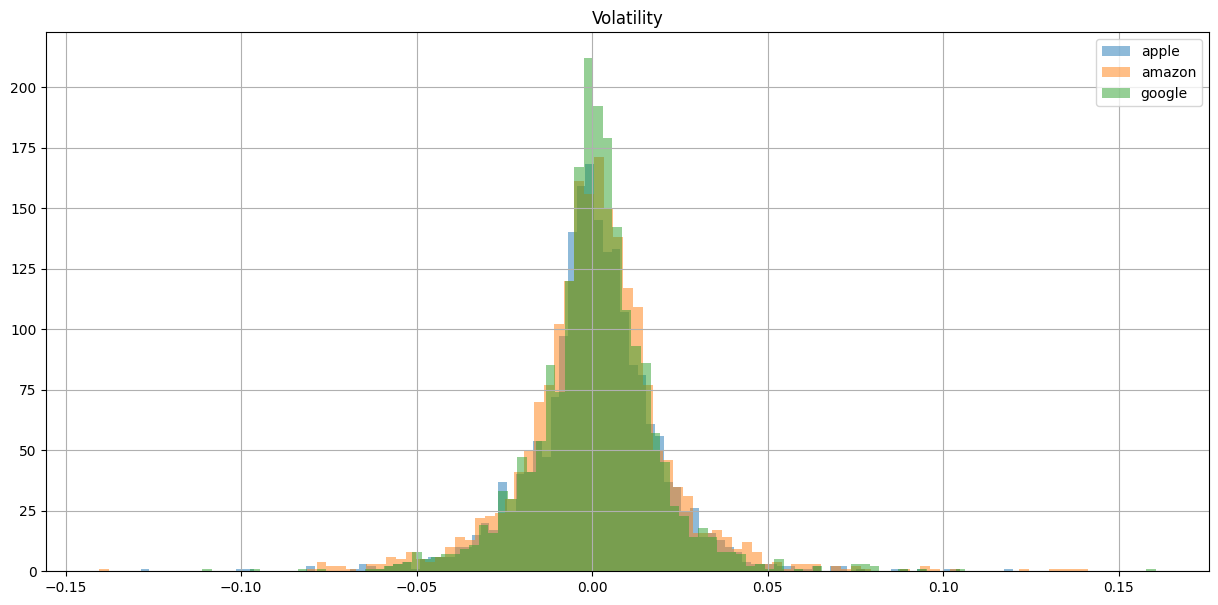

In [32]:
apple['returns'] = (apple['Close']/apple['Close'].shift(1)) -1
amazon['returns'] = (amazon['Close']/amazon['Close'].shift(1))-1
google['returns'] = (google['Close']/google['Close'].shift(1)) - 1
apple['returns'].hist(bins = 100, label = 'apple', alpha = 0.5, figsize = (15,7))
amazon['returns'].hist(bins = 100, label = 'amazon', alpha = 0.5)
google['returns'].hist(bins = 100, label = 'google', alpha = 0.5)
plt.title("Volatility")
plt.legend()

array([[<Axes: xlabel='Apple', ylabel='Apple'>,
        <Axes: xlabel='Amazon', ylabel='Apple'>,
        <Axes: xlabel='Google', ylabel='Apple'>],
       [<Axes: xlabel='Apple', ylabel='Amazon'>,
        <Axes: xlabel='Amazon', ylabel='Amazon'>,
        <Axes: xlabel='Google', ylabel='Amazon'>],
       [<Axes: xlabel='Apple', ylabel='Google'>,
        <Axes: xlabel='Amazon', ylabel='Google'>,
        <Axes: xlabel='Google', ylabel='Google'>]], dtype=object)

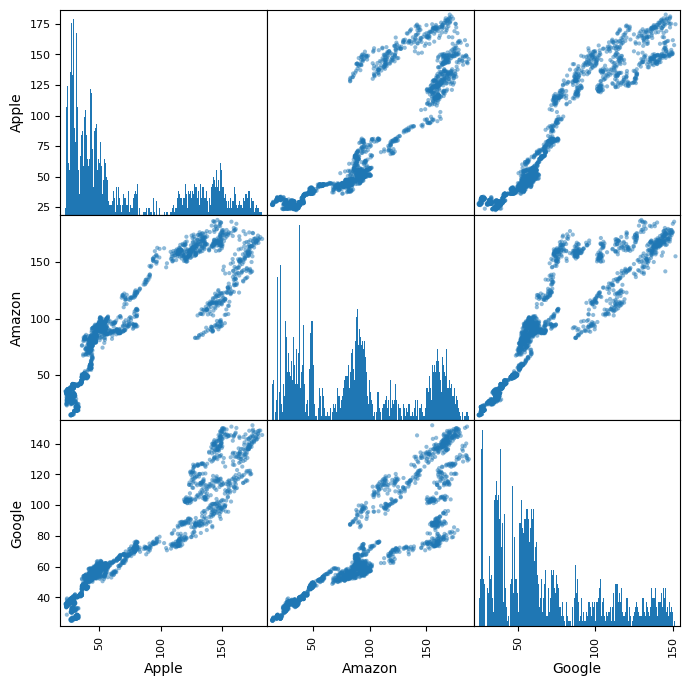

In [33]:
data = pd.concat([apple['Open'],amazon['Open'],google['Open']],axis = 1)
data.columns = ['Apple','Amazon','Google']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})